In [9]:
library(lattice)

In [19]:
A <- matrix(c(2, 0,
              0, 4), nrow = 2, byrow = TRUE)
b <- c(-4, -8)
x0 <- c(1, 1)
eta <- 0.1
epsilon <- 1e-6
maxiter=10000

In [31]:
gradientDesc <- function(learn_rate, conv_threshold, max_iter, A, b, x0) {
  # Initialize x
  x <- x0  # x = [x_1, x_2]
  
  # Initial objective: f(x) = x^T A x + b^T x
  loss <- t(x) %*% A %*% x + t(b) %*% x
  
  # Initialize history
  iterations <- 1
  loss_history <- numeric(max_iter)
  x_history <- matrix(0, nrow = max_iter, ncol = 2)
  
  converged <- FALSE
  while (!converged) {
    # Compute gradient: grad = 2 * A x + b
    grad <- 2 * A %*% x + b
    
    # Update x
    x <- x - learn_rate * grad
    
    # New loss
    loss_new <- t(x) %*% A %*% x + t(b) %*% x
    
    # Store history
    loss_history[iterations + 1] <- loss_new
    x_history[iterations + 1, ] <- x
    
    # Check convergence based on gradient norm
    grad_norm <- sqrt(sum(grad^2))
    if (grad_norm < conv_threshold) {
      converged <- TRUE
      cat("Optimal x:", x, "\n")
      cat("Iterations:", iterations, "\n")
      cat("Final Loss:", loss_new, "\n")
      break
    }
    
    # Update loss and iteration count
    loss <- loss_new
    iterations <- iterations + 1
    
    # Check max iterations
    if (iterations >= max_iter) {
      converged <- TRUE
      cat("Optimal x:", x, "\n")
      cat("Iterations:", iterations, "\n")
      cat("Final Loss:", loss_new, "\n")
      break
    }
  }
  
  # Trim history
  loss_history <- loss_history[1:iterations]
  x_history <- x_history[1:iterations, ]
  
  # Return results
  return(list(x = x, loss = loss_new, iterations = iterations,
              loss_history = loss_history, x_history = x_history))
}

In [33]:
result=gradientDesc(eta,epsilon,maxiter,A,b,x0)

Optimal x: 1 1 
Iterations: 1 
Final Loss: -6 


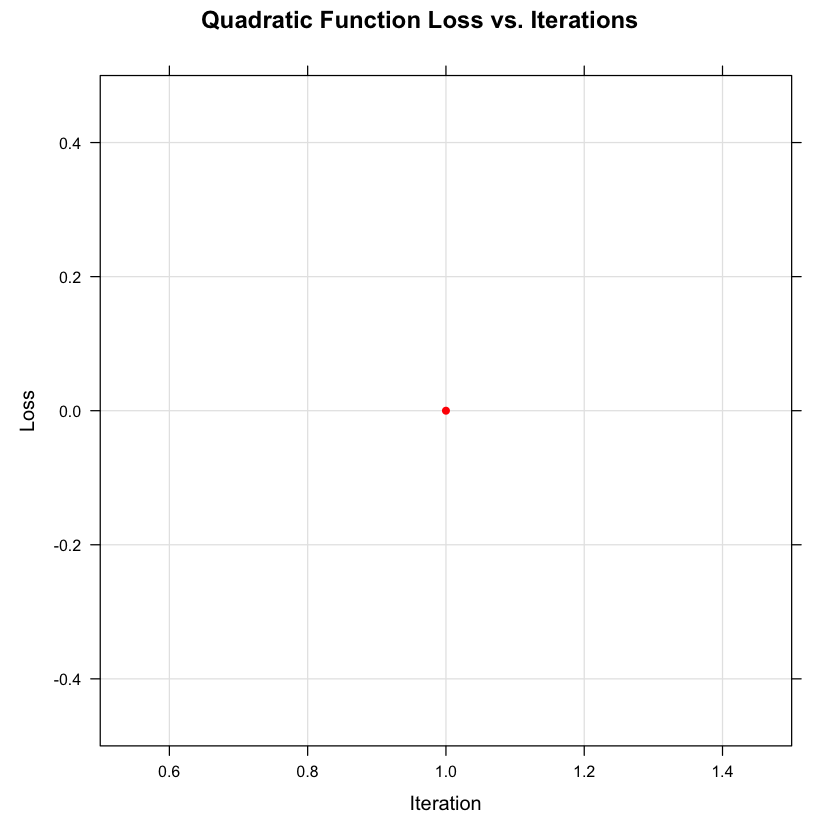

In [52]:
xyplot(result$loss_history ~ seq(1, result$iterations),  
       col = "red",
       pch=16,
       grid = TRUE,
       xlab = "Iteration", 
       ylab = "Loss",
       main = "Quadratic Function Loss vs. Iterations")
